In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [2]:
# Load the dataset
data = pd.read_csv('data_after_onehot.csv')

data.head()

,person_age,person_gender,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,...,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22.0,0,71948.0,0.0,23093.125,16.02,0.37,3.0,561.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,21.0,0,12282.0,0.0,1000.000,11.14,0.08,2.0,504.0,1,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,25.0,0,12438.0,3.0,5500.000,12.87,0.37,3.0,635.0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,23.0,0,79753.0,0.0,23093.125,15.23,0.37,2.0,675.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,24.0,1,66135.0,1.0,23093.125,14.27,0.37,4.0,586.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


## Step 04: Scaling

## Normalization

In [3]:
from sklearn.preprocessing import MinMaxScaler

# Define numerical columns to scale
num_cols = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 
            'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 
            'credit_score']

# Initialize and apply scaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(data[num_cols]), columns=num_cols)

df_scaled

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score
0,0.105263,0.398015,0.000000,1.000000,0.748059,1.000000,0.074074,0.230072
1,0.052632,0.026651,0.000000,0.022131,0.403670,0.216216,0.000000,0.023551
2,0.263158,0.027622,0.162162,0.221306,0.525759,1.000000,0.074074,0.498188
3,0.157895,0.446594,0.000000,1.000000,0.692308,1.000000,0.000000,0.643116
4,0.210526,0.361835,0.054054,1.000000,0.624559,1.000000,0.148148,0.320652
...,...,...,...,...,...,...,...,...
44995,0.368421,0.248781,0.324324,0.641788,0.722653,0.837838,0.074074,0.534420
44996,0.894737,0.359750,0.918919,0.376221,0.610445,0.378378,0.666667,0.447464
44997,0.684211,0.304617,0.378378,0.100517,0.324629,0.135135,0.592593,0.617754
44998,0.473684,0.156622,0.216216,0.509004,0.551164,0.972973,0.296296,0.385870


In [4]:
# Create a new dataset with both OneHot encoding AND normalization
data_final = data.copy()  # This already has OneHot encoded columns
data_final[num_cols] = df_scaled  # Replace numerical columns with normalized values
data_final.to_csv('data_normalization.csv', index=False)
print("Saved: data_normalization.csv")

Saved: data_normalization.csv


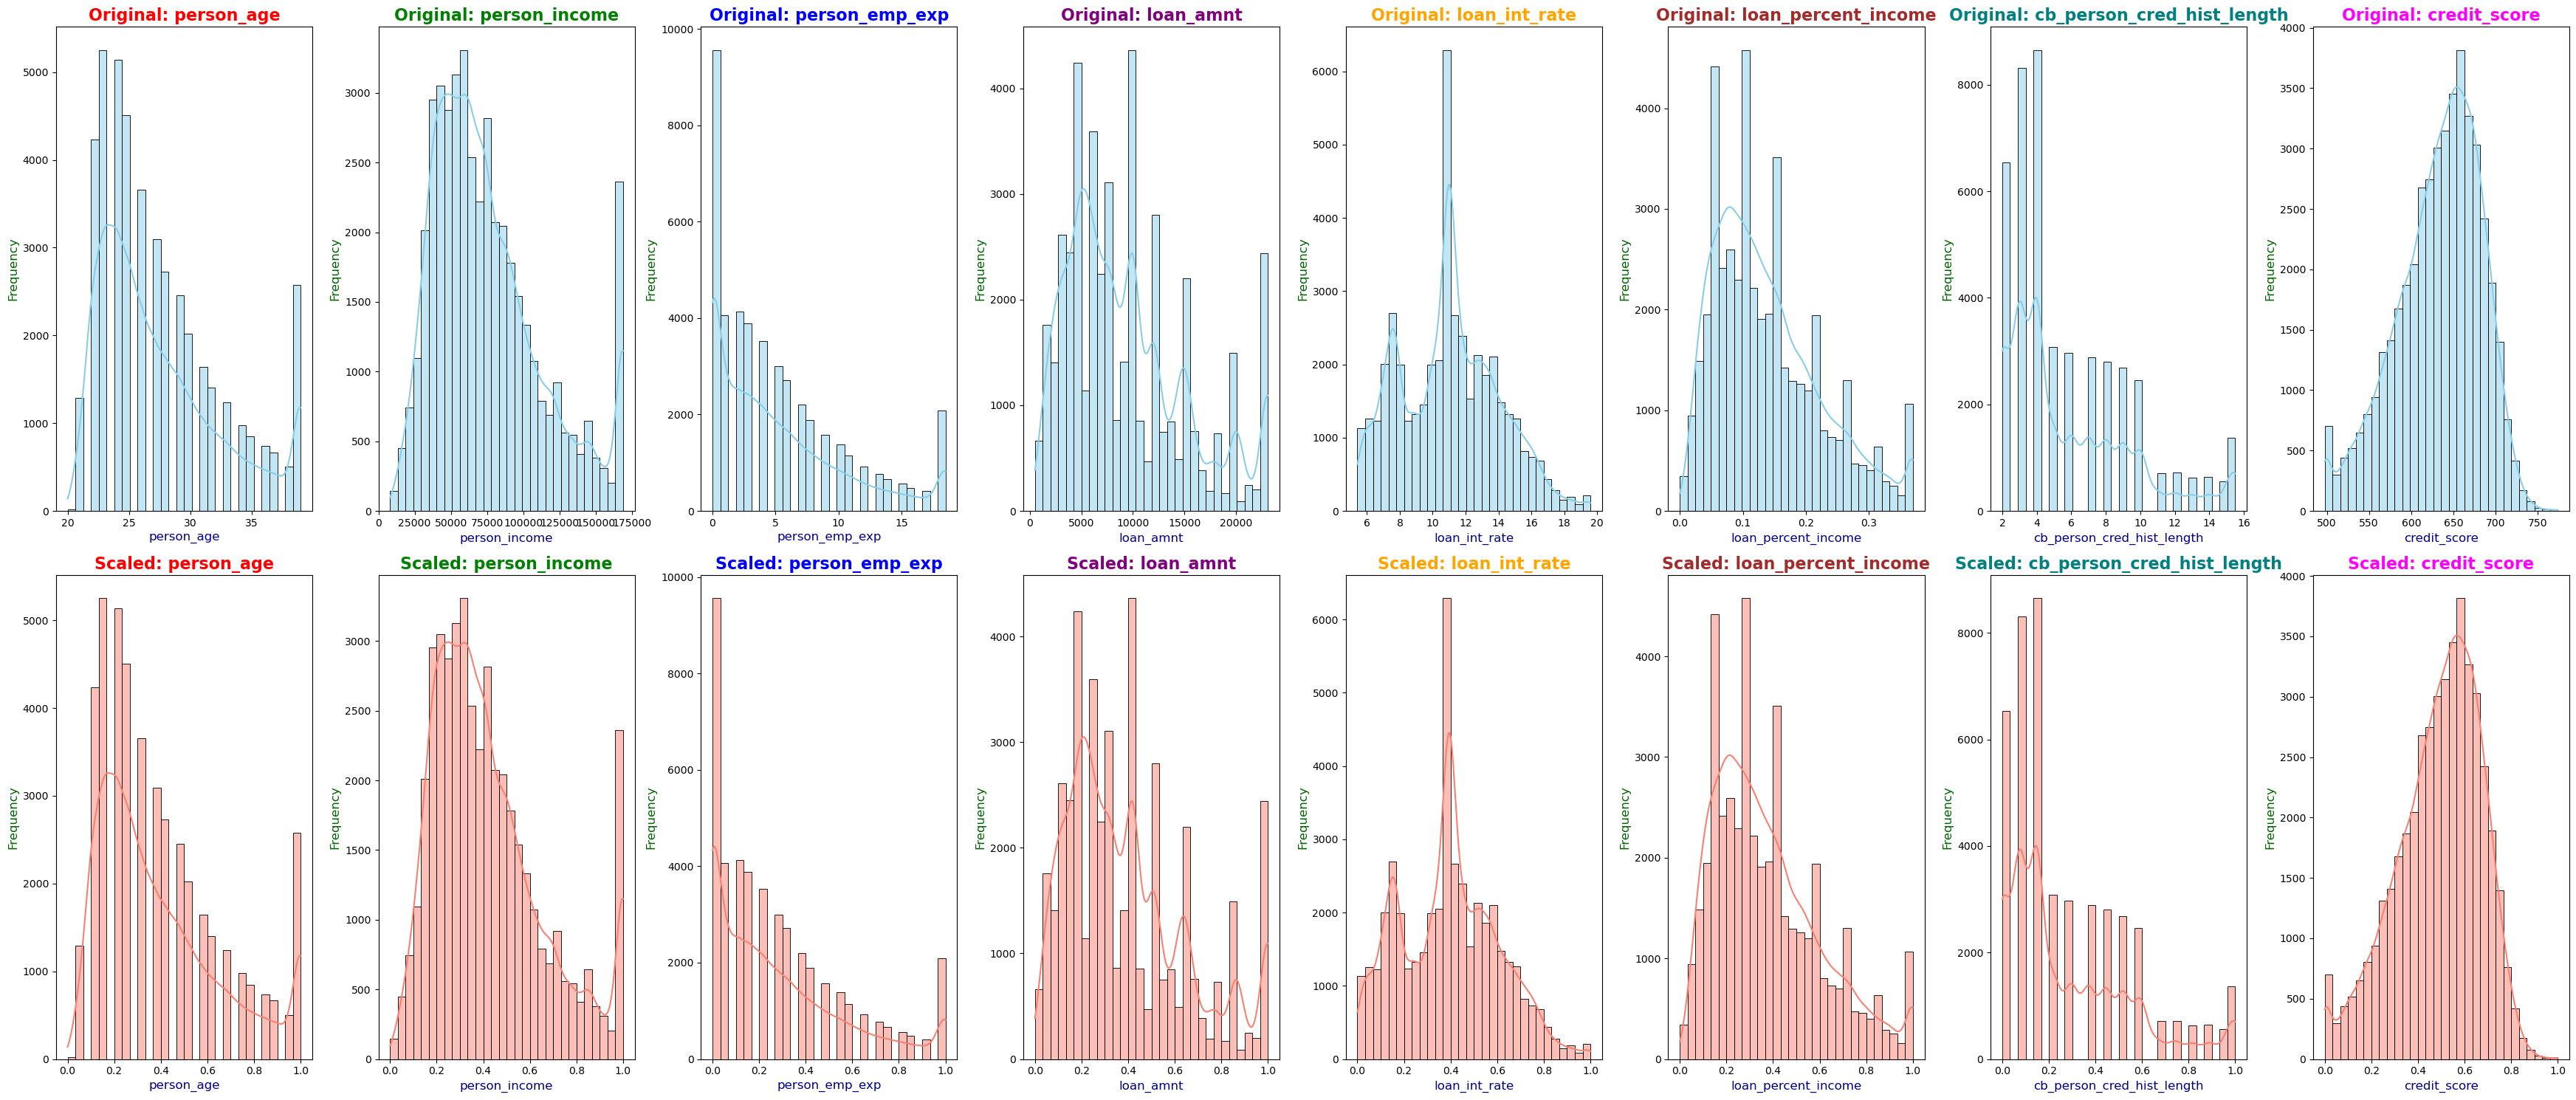

In [5]:
# Create large figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=len(num_cols), figsize=(35,15))

# Define colors for titles
colors = ["red", "green", "blue", "purple", "orange", "brown", "teal", "magenta"]

for i, col in enumerate(num_cols):
    # Original distribution
    sns.histplot(data[col], bins=30, ax=axes[0,i], kde=True, color="skyblue")
    axes[0,i].set_title(f"Original: {col}", fontsize=16, color=colors[i], fontweight="bold")
    axes[0,i].set_xlabel(col, fontsize=12, color="darkblue")
    axes[0,i].set_ylabel("Frequency", fontsize=12, color="darkgreen")

    # Scaled distribution
    sns.histplot(df_scaled[col], bins=30, ax=axes[1,i], kde=True, color="salmon")
    axes[1,i].set_title(f"Scaled: {col}", fontsize=16, color=colors[i], fontweight="bold")
    axes[1,i].set_xlabel(col, fontsize=12, color="darkblue")
    axes[1,i].set_ylabel("Frequency", fontsize=12, color="darkgreen")

# Adjust spacing
plt.tight_layout()
plt.show()
plt.close()

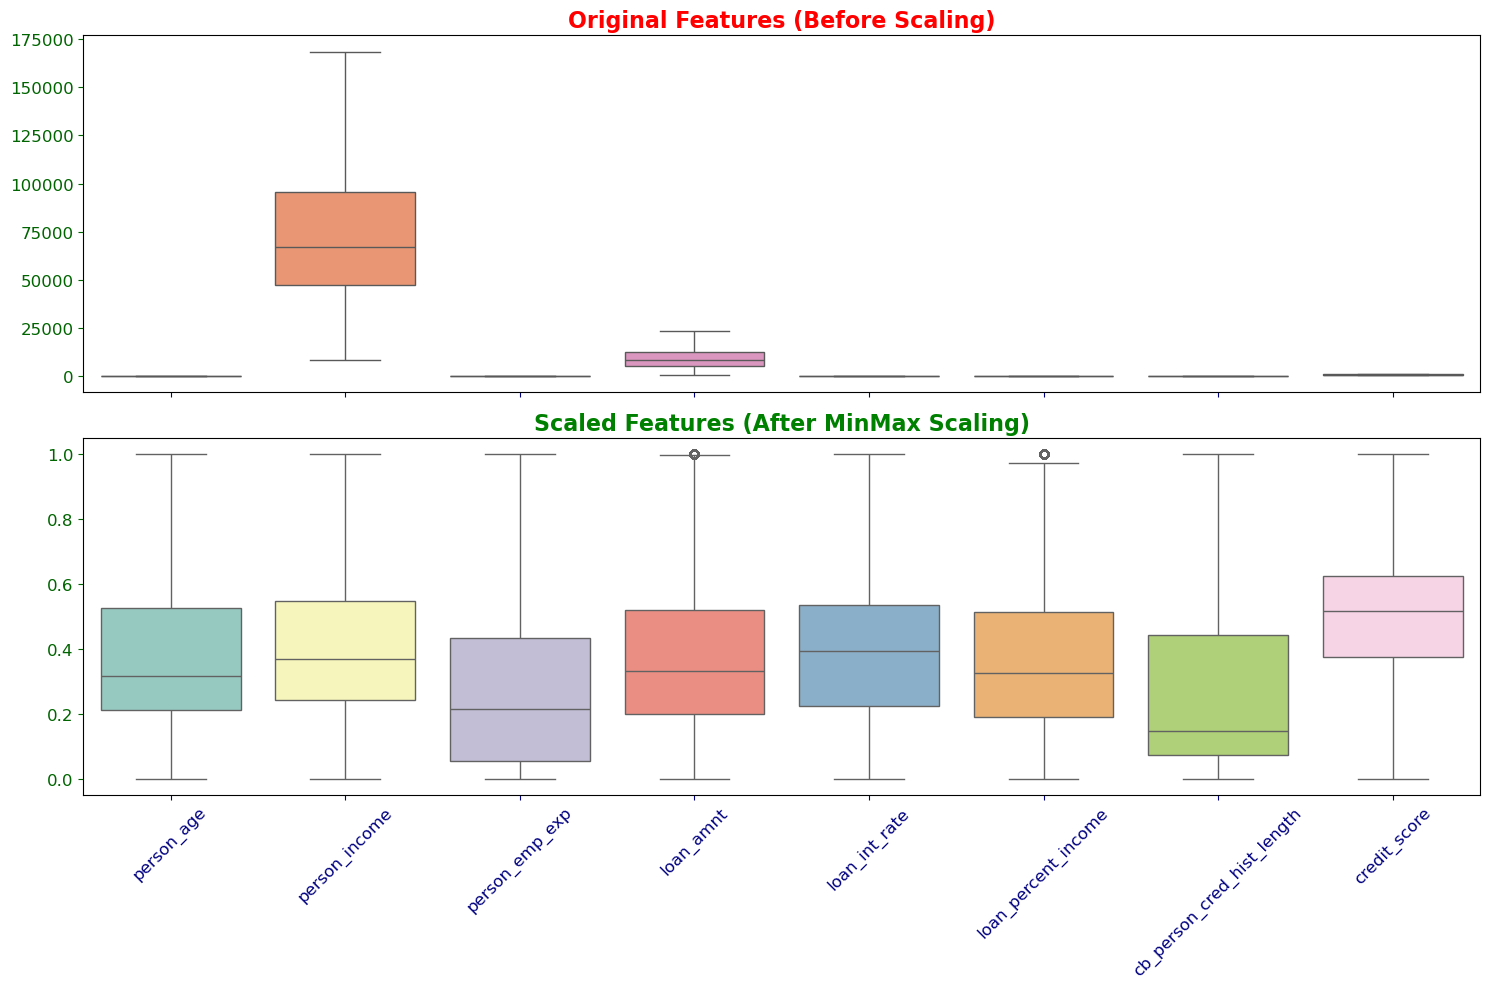

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,10), sharex=True)

# Original Data
sns.boxplot(data=data[num_cols], ax=axes[0], palette="Set2")
axes[0].set_title("Original Features (Before Scaling)", fontsize=16, color="red", fontweight="bold")
axes[0].tick_params(axis="x", rotation=45, labelsize=12, colors="navy")
axes[0].tick_params(axis="y", labelsize=12, colors="darkgreen")

# Scaled Data
sns.boxplot(data=df_scaled[num_cols], ax=axes[1], palette="Set3")
axes[1].set_title("Scaled Features (After MinMax Scaling)", fontsize=16, color="green", fontweight="bold")
axes[1].tick_params(axis="x", rotation=45, labelsize=12, colors="navy")
axes[1].tick_params(axis="y", labelsize=12, colors="darkgreen")

plt.tight_layout()
plt.show()
plt.close()